# LIYS2

In [1]:
from mp_api.client import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mp_key = "PgRtTbiMJ5N3guKB8xgaTcXoz0bUQyKD"
mp_id = "mp-15788"

In [3]:
with MPRester(mp_key) as m:
    prim_struc = m.get_bandstructure_by_material_id(mp_id)

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# 1) Bande interdite

{'direct': False, 'energy': 1.9203999999999994, 'transition': '(0.030,0.000,-0.030)-F'}

La bande interdite est indirecte. Ceci signifie que le maximum de la dernière bande de valence n'est pas aligné avec le minimum de la première bande de conduction. La largeur de la bande interdite est ≃ 1.92 eV, valeur caractéristique d'un semi-conducteur. La transition électronique s’effectue entre les points verts et rouges, en (0.030, 0.000, -0.030).
Voici la structure de bandes électroniques de ce matériau :


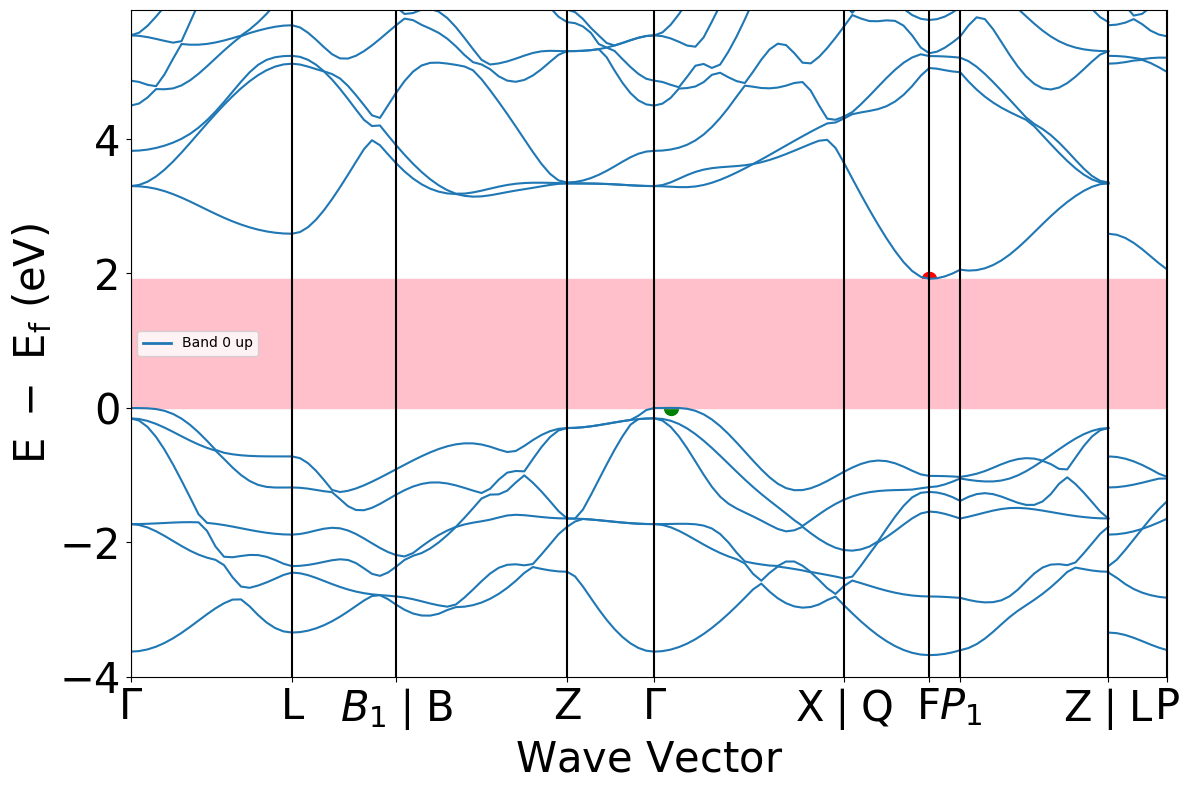

In [4]:
band_gap = prim_struc.get_band_gap()
plot_bs = BSPlotter(prim_struc) 

data = plot_bs.bs_plot_data()
energy = band_gap.get('energy')
distance = data.get('ticks').get('distance')

plot_bs.get_plot(vbm_cbm_marker=True)
plt.fill_between(np.linspace(distance[0], distance[-1], 2), 0, energy, color = "pink")


print(prim_struc.get_band_gap())
print("\nLa bande interdite est indirecte. Ceci signifie que le maximum de la dernière bande de valence n'est pas aligné avec le minimum de la première bande de conduction. La largeur de la bande interdite est ≃ 1.92 eV, valeur caractéristique d'un semi-conducteur. La transition électronique s’effectue entre les points verts et rouges, en (0.030, 0.000, -0.030).")
print("Voici la structure de bandes électroniques de ce matériau :")

# 2) Directions de dispersion

# A. Dernière bande de valence

In [5]:
vbm = prim_struc.get_vbm()
print(vbm["band_index"])
print("La bande 12 est donc la dernière bande de valence.")

defaultdict(<class 'list'>, {<Spin.up: 1>: [12]})
La bande 12 est donc la dernière bande de valence.


# B. Première bande de conduction

In [6]:
cbm = prim_struc.get_cbm()
print(cbm["band_index"])
print("La bande 13 est donc la première bande de conduction.")

defaultdict(<class 'list'>, {<Spin.up: 1>: [13]})
La bande 13 est donc la première bande de conduction.


# C. Directions de dispersion

La dernière bande de valence présente le plus de dispersion entre Z|L et P et le moins entre F et P1.
La première bande de conduction présente le plus de dispersion entre X|Q et F et le moins entre Z et Γ.
Les flèches rouges représentent la direction où il y a le plus de dispersion, les flèches bleues représentent celle où il y en a le moins.


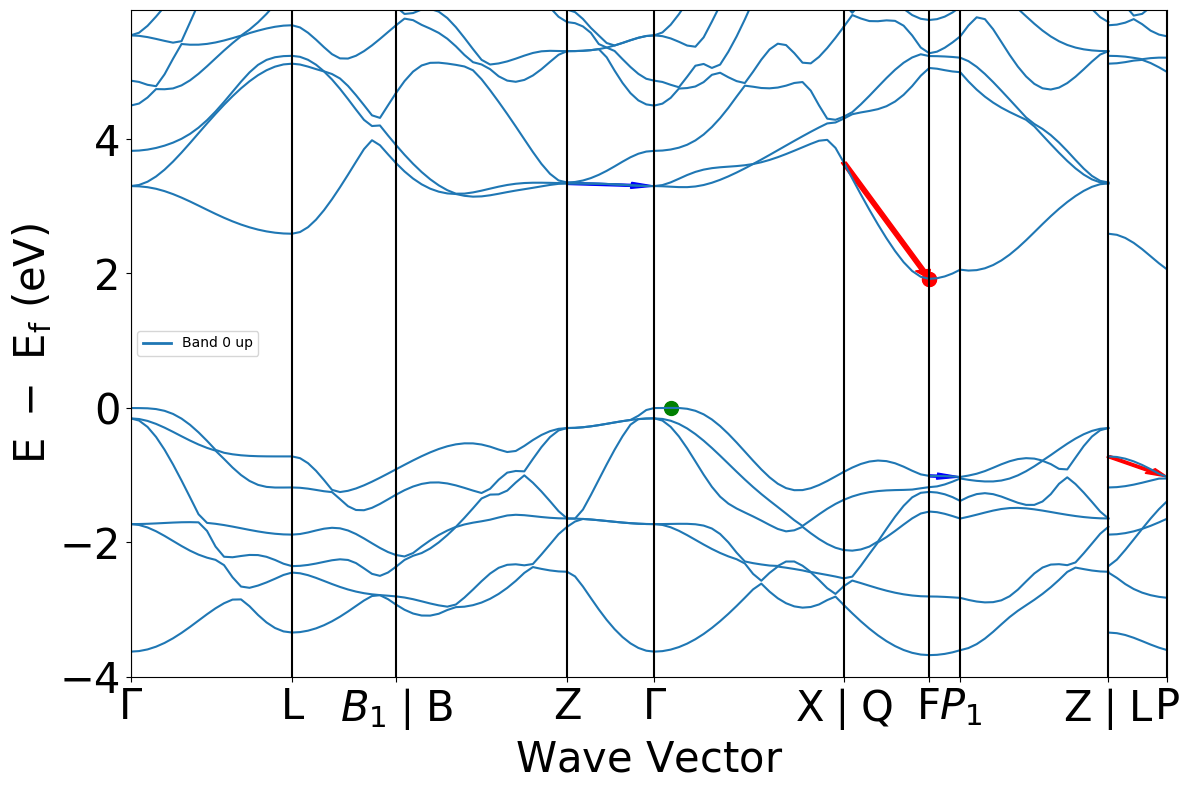

In [7]:
distances = data['distances']
energy = data['energy']

valence = [] 
conduction = []

for i in range(len(distances)):
    dx = distances[i][0]-distances[i][-1]
    
    dy_valence = energy['1'][i][12][0]-energy['1'][i][12][-1] 
    dy_conduction = energy['1'][i][13][0]-energy['1'][i][13][-1]
    
    slope_valence = abs(dy_valence/dx)
    slope_conduction = abs(dy_conduction/dx)
    
    conduction.append(slope_conduction)
    valence.append(slope_valence)
    
    
valence_max = valence.index(max(valence))
valence_min = valence.index(min(valence))
conduction_max = conduction.index(max(conduction))
conduction_min = conduction.index(min(conduction))

print("La dernière bande de valence présente le plus de dispersion entre Z|L et P et le moins entre F et P1.")
print("La première bande de conduction présente le plus de dispersion entre X|Q et F et le moins entre Z et Γ.")
print("Les flèches rouges représentent la direction où il y a le plus de dispersion, les flèches bleues représentent celle où il y en a le moins.")

plot_bs.get_plot(vbm_cbm_marker=True)

# Dernière bande de valence
plt.arrow(distances[valence_min][0], energy['1'][valence_min][12][0], 
          distances[valence_min][-1]-distances[valence_min][0],
          energy['1'][valence_min][12][-1]-energy['1'][valence_min][12][0],
          width = 0.03,length_includes_head=True,color='blue') 

plt.arrow(distances[valence_max][0],energy['1'][valence_max][12][0], 
          distances[valence_max][-1]-distances[valence_max][0],
          energy['1'][valence_max][12][-1]-energy['1'][valence_max][12][0],
          width = 0.03,length_includes_head=True,color='red') 

# Première bande de conduction
plt.arrow(distances[conduction_min][0],energy['1'][conduction_min][13][0], 
          distances[conduction_min][-1]-distances[conduction_min][0],
          energy['1'][conduction_min][13][-1]-energy['1'][conduction_min][13][0],
          width = 0.03,length_includes_head=True,color='blue')

plt.arrow(distances[conduction_max][0], energy['1'][conduction_max][13][0],
          distances[conduction_max][-1]-distances[conduction_max][0],
          energy['1'][conduction_max][13][-1]-energy['1'][conduction_max][13][0],
          width = 0.03,length_includes_head=True,color='red') 

plt.show()

# 3) Masse effective

In [8]:
hbarre = 6.62607015e-34/(2*np.pi) # [J/s]
eV = 1.6022e-19 # 1 eV en J
A = 1e-10 # 1 Å en m

valence_k = prim_struc.get_vbm()['kpoint'].frac_coords
conduction_k = prim_struc.get_cbm()['kpoint'].frac_coords

valence_energy = prim_struc.get_vbm()['energy'] 
conduction_energy = prim_struc.get_cbm()['energy'] 

valence_masse = (hbarre**2*(valence_k[0]**2+valence_k[1]**2+valence_k[2]**2))/(2*valence_energy*eV*A**2)
conduction_masse = (hbarre**2*(conduction_k[0]**2+conduction_k[1]**2+conduction_k[2]**2))/(2*conduction_energy*eV*A**2)


print("La masse effective au sommet de la dernière bande de valence est de",valence_masse,"kg.")
print("La masse effective à la base de la première bande de conduction est de",conduction_masse,"kg.")

La masse effective au sommet de la dernière bande de valence est de 2.2415768757330028e-33 kg.
La masse effective à la base de la première bande de conduction est de 3.6931579842845214e-31 kg.
